In [12]:
# import the necessary packages
import pandas as pd
import numpy as np
from IPython.display import Image
import cv2
import sys, os

sys.path.append(os.path.abspath(os.path.join("../..")))
sys.path.append(os.path.abspath(os.path.join("../scripts")))


In [2]:
from color_extraction import extract_color

extract_color = extract_color()

# Compute Colorfulness Metric

## Start_frames

In [3]:
images = pd.read_csv('../data/path_to_creative_assets.csv')

images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   game_id      905 non-null    object
 1   start_frame  905 non-null    object
 2   end_frame    905 non-null    object
dtypes: object(3)
memory usage: 21.3+ KB


In [8]:
start_frame_colorfulness = []

for path_to_img in images['start_frame']:
    value = np.nan
    if os.path.exists(path_to_img):
        value = extract_color.image_colorfulness(path_to_img)
        
    start_frame_colorfulness.append(value)

In [9]:
startframe_df = pd.DataFrame(columns=['game_id', 'start_frame_colorfulness'])

startframe_df['game_id'] = images['game_id']

startframe_df['start_frame_colorfulness'] = start_frame_colorfulness

In [10]:
startframe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   game_id                   905 non-null    object 
 1   start_frame_colorfulness  869 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.3+ KB


In [11]:
startframe_df.describe()

,start_frame_colorfulness
count,869.000000
mean,54.279239
std,38.193551
min,0.000000
25%,23.672995
50%,47.903455
75%,75.828141
max,165.778804


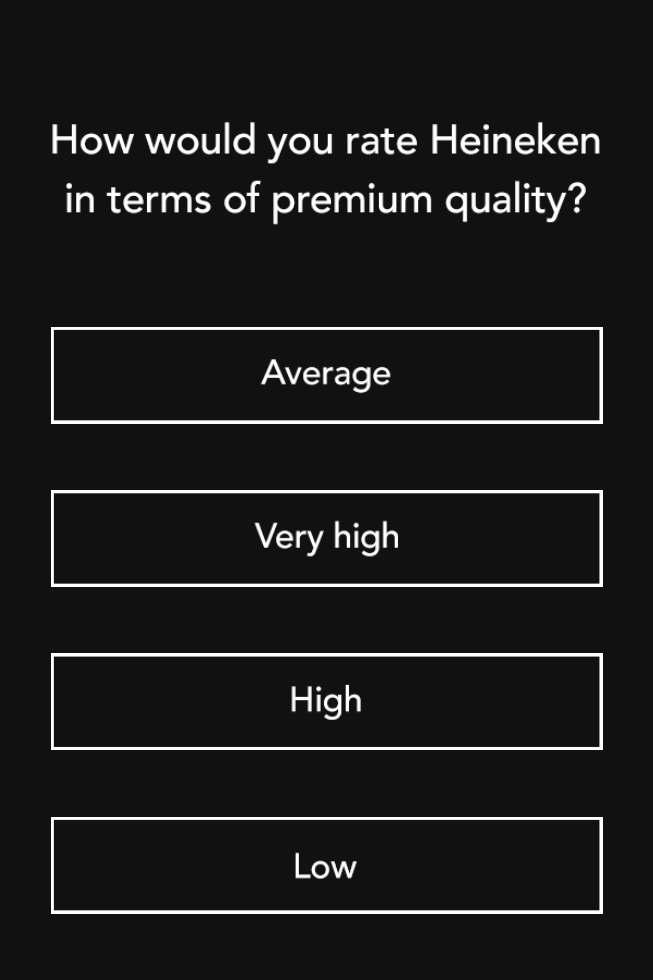

In [35]:
# least colorful pic
value = min(start_frame_colorfulness)
gameid = startframe_df.loc[startframe_df['start_frame_colorfulness']==value,'game_id']

pic = images.loc[images['game_id']==gameid.iloc[4], 'start_frame'].iloc[0]

Image(pic)

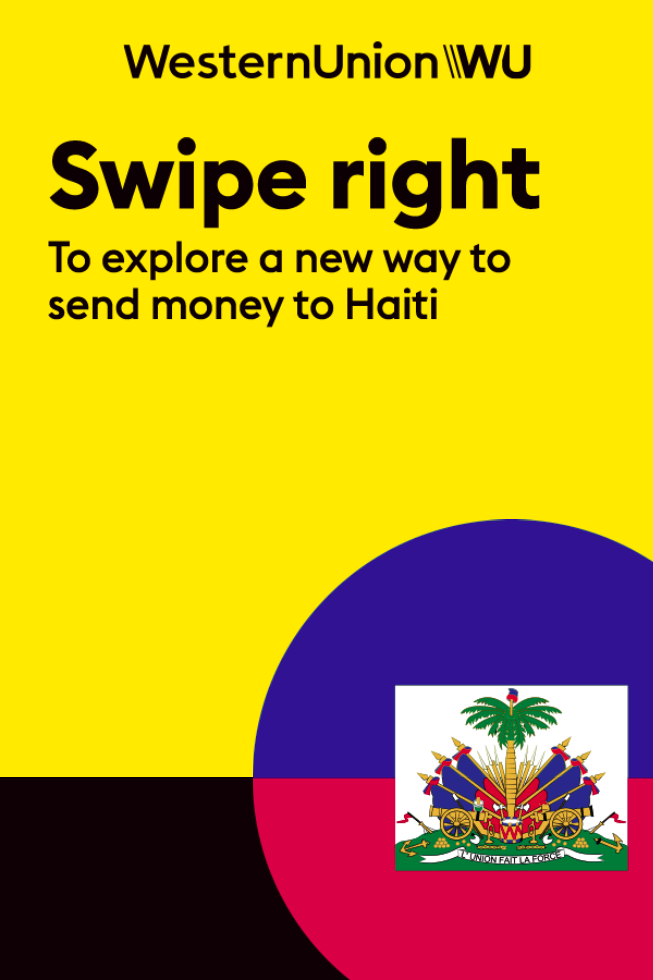

In [32]:
# most colorful pic
value = max(start_frame_colorfulness)
gameid = startframe_df.loc[startframe_df['start_frame_colorfulness']==value,'game_id']

pic = images.loc[images['game_id']==gameid.iloc[0], 'start_frame'].iloc[0]

Image(pic)

In [37]:
startframe_df.to_csv('../data/start_frame_colorfulness.csv', index=False)

## end_frames

In [38]:
images = pd.read_csv('../data/path_to_creative_assets.csv')

images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   game_id      905 non-null    object
 1   start_frame  905 non-null    object
 2   end_frame    905 non-null    object
dtypes: object(3)
memory usage: 21.3+ KB


In [39]:
end_frame_colorfulness = []

for path_to_img in images['end_frame']:
    value = np.nan
    if os.path.exists(path_to_img):
        value = extract_color.image_colorfulness(path_to_img)
        
    end_frame_colorfulness.append(value)

In [40]:
endframe_df = pd.DataFrame(columns=['game_id', 'end_frame_colorfulness'])

endframe_df['game_id'] = images['game_id']

endframe_df['end_frame_colorfulness'] = end_frame_colorfulness

In [41]:
endframe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 905 non-null    object 
 1   end_frame_colorfulness  243 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.3+ KB


In [42]:
endframe_df.describe()

,end_frame_colorfulness
count,243.000000
mean,61.804347
std,42.259425
min,0.000000
25%,20.291006
50%,58.221567
75%,89.284234
max,159.007512


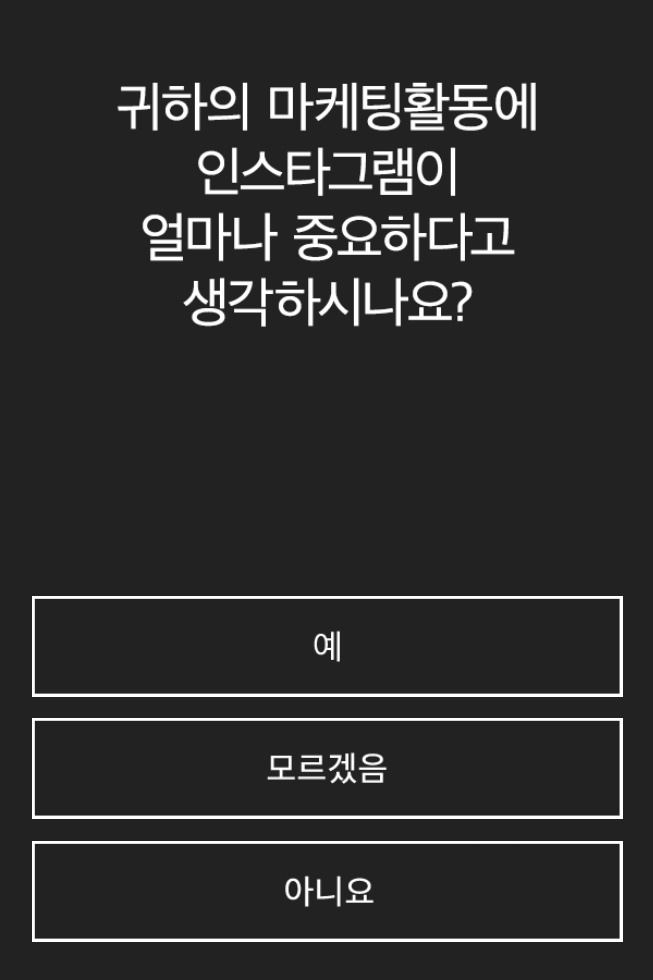

In [45]:
# least colorful pic
value = min(end_frame_colorfulness)
gameid = endframe_df.loc[endframe_df['end_frame_colorfulness']==value,'game_id']

pic = images.loc[images['game_id']==gameid.iloc[0], 'end_frame'].iloc[0]

Image(pic)

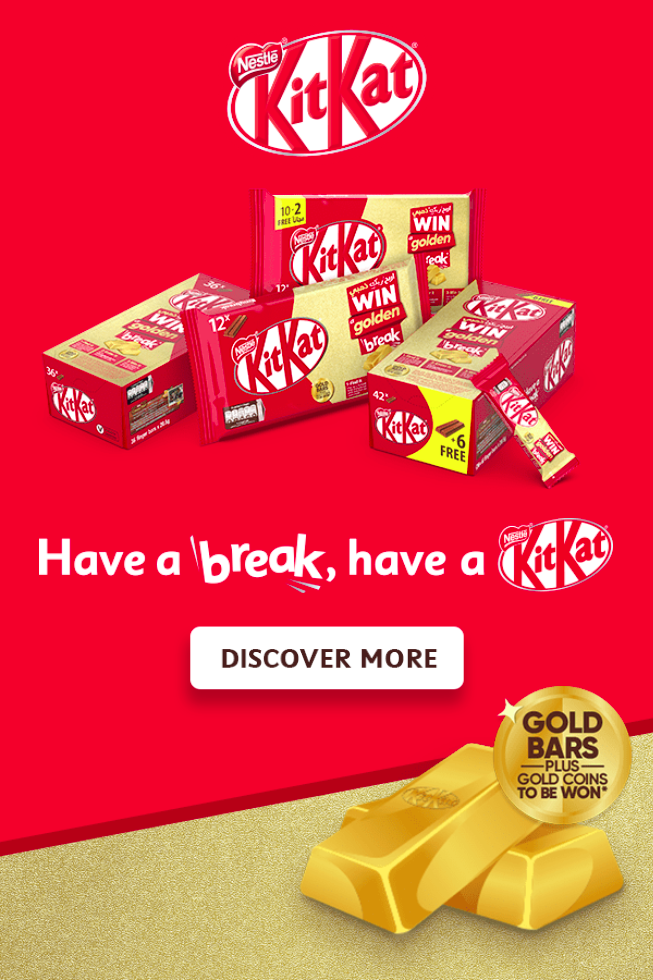

In [46]:
# most colorful pic
value = max(end_frame_colorfulness)
gameid = endframe_df.loc[endframe_df['end_frame_colorfulness']==value,'game_id']

pic = images.loc[images['game_id']==gameid.iloc[0], 'end_frame'].iloc[0]

Image(pic)

In [47]:
endframe_df.to_csv('../data/end_frame_colorfulness.csv', index=False)